In [141]:
import japanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [142]:
df_vg1000 = pd.read_csv("vg1000.csv")
df_vg3000 = pd.read_csv("vg3000.csv")
df_vd100 = pd.read_csv("vd100.csv")
df_vd300 = pd.read_csv("vd300.csv")

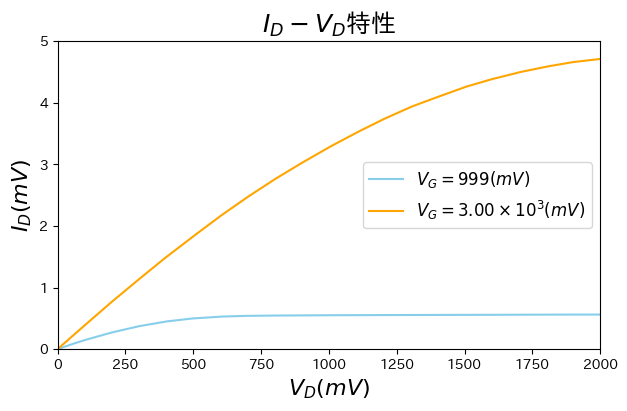

In [143]:
plt.figure(figsize=(7, 4))  

# df_vd100の1列目をx軸、2列目をy軸としてプロット
plt.plot(df_vg1000.iloc[:, 0], df_vg1000.iloc[:, 1], label='$V_{G} = 999 (mV)$', color='skyblue')

# df_vd300の1列目をx軸、2列目をy軸としてプロット
plt.plot(df_vg3000.iloc[:, 0], df_vg3000.iloc[:, 1], label=r'$V_{G} = 3.00 \times{10^3} (mV)$', color='orange')

# グラフの装飾
plt.xlabel('$V_{D} (mV)$', fontsize=16)  
plt.ylabel('$I_{D} (mV)$', fontsize=16)  
plt.xlim(0, 2000)
plt.ylim(0,5)
plt.title('$I_{D}-V_{D}$特性', fontsize=18)
plt.legend(loc = "center right", fontsize=12)

# 表示
plt.show()

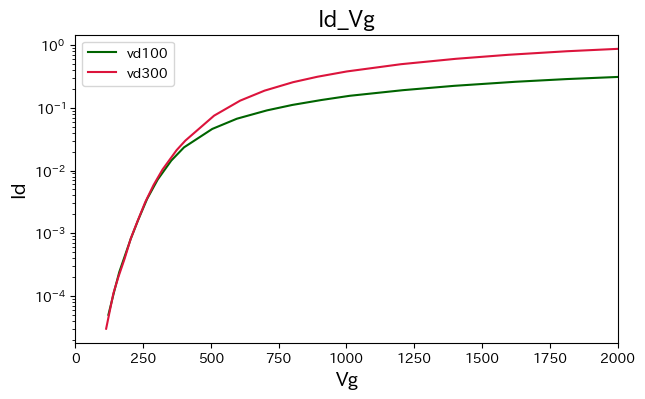

In [144]:
plt.figure(figsize=(7, 4))  # グラフサイズを指定（任意）

# df_vd100の1列目をx軸、2列目をy軸としてプロット
plt.plot(df_vd100.iloc[:, 0], df_vd100.iloc[:, 1], label='vd100', color='darkgreen')

# df_vd300の1列目をx軸、2列目をy軸としてプロット
plt.plot(df_vd300.iloc[:, 0], df_vd300.iloc[:, 1], label='vd300', color='crimson')

# グラフの装飾
plt.xlabel('Vg', fontsize=14)  
plt.ylabel('Id', fontsize=14)  
plt.xlim(0, 2000)
plt.yscale('log')
plt.title('Id_Vg', fontsize=16)
plt.legend()

# 表示
plt.show()

In [145]:
df_vd100.head()

,V_G(mV),I_D
0,122.2,0.00005
1,144.0,0.00012
2,162.3,0.00024
3,182.5,0.00043
4,204.0,0.00080


In [146]:
df_vd300.head()

,V_G(mV),I_D
0,113.9,0.00003
1,140.6,0.00011
2,158.9,0.00020
3,181.8,0.00039
4,205.0,0.00083


しきい値電圧 VT ≈ 231.9 mV


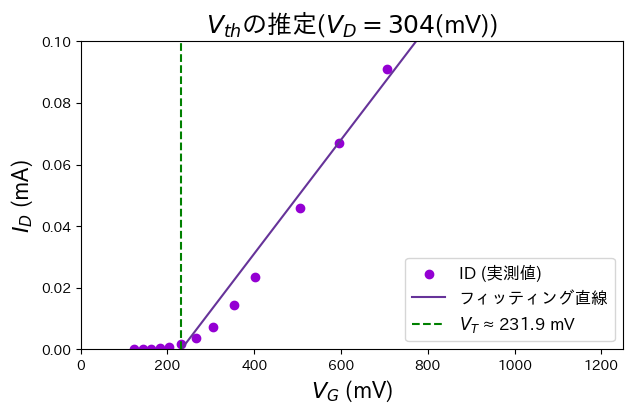

In [127]:
#Vthを求める(これは間違い）

VG = df_vd100["V_G(mV)"].values
ID = df_vd100["I_D"].values

mask = ID > 0.0008
VG_fit = VG[mask]
ID_fit = ID[mask]

# 線形回帰
model = LinearRegression()
model.fit(VG_fit.reshape(-1, 1), ID_fit)

# 傾きと切片
slope = model.coef_[0]
intercept = model.intercept_

# しきい値電圧 VT = -intercept / slope
VT = -intercept / slope

print(f"しきい値電圧 VT ≈ {VT:.1f} mV")

# グラフ描画
plt.figure(figsize=(7, 4))
plt.scatter(VG, ID, label='ID (実測値)', color='darkviolet')
plt.plot(VG_fit, model.predict(VG_fit.reshape(-1, 1)), label='フィッティング直線', color='rebeccapurple')
plt.axvline(x=VT, linestyle='--', color='green', label=f'$V_T$ ≈ {VT:.1f} mV')
plt.ylim(0, 0.1)
plt.xlim(0, 1250)
plt.xlabel("$V_G$ (mV)", fontsize=16)
plt.ylabel("$I_D$ (mA)", fontsize=16)
plt.title("$V_{th}$の推定($V_{D} = 304$(mV))", fontsize=18)
#plt.grid(True)
plt.legend(fontsize=12)
#plt.tight_layout()
#plt.savefig("vth2.png", bbox_inches='tight')
plt.show()

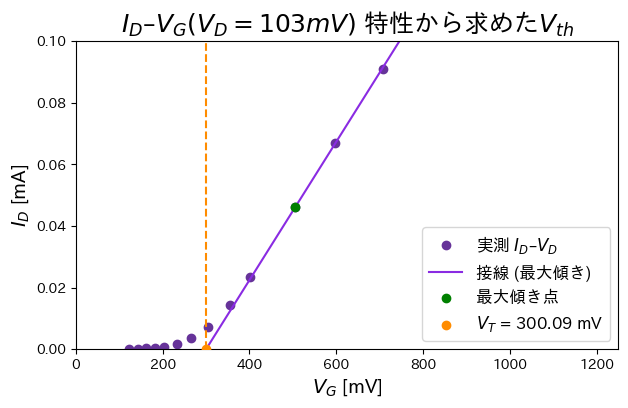

In [184]:
Vg = df_vd100["V_G(mV)"].values
Id = df_vd100["I_D"].values

# 中央差分で数値微分（dId/dVd）
dId_dVg = np.gradient(Id, Vg)

# 傾きが最大になる点（＝急上昇点）を特定
max_index = np.argmax(dId_dVg)
Vg_max_slope = Vg[max_index]
Id_max_slope = Id[max_index]
slope_max = dId_dVg[max_index]

# 接線（1次関数）を作成：y = slope_max * (Vd - Vd0) + Id0
Vg_fit = np.linspace(min(Vg), max(Vg), 200)
tangent_line = slope_max * (Vg_fit - Vg_max_slope) + Id_max_slope

#Vth
vth = Vg_max_slope - Id_max_slope / slope_max

# プロット
plt.figure(figsize=(7, 4))
plt.plot(Vg, Id, 'o', label="実測 $I_D$–$V_D$", color = "rebeccapurple")
plt.plot(Vg_fit, tangent_line, '-', label="接線 (最大傾き)", color="blueviolet")
plt.scatter(Vg_max_slope, Id_max_slope, color='green', zorder=3, label="最大傾き点")
plt.scatter(vth, 0, color='darkorange', zorder=4, label=f'$V_T$ = {vth:.2f} mV')
plt.axvline(x=vth, linestyle='--', color='darkorange')
plt.xlim(0, 1250)
plt.ylim(0, 0.1)
plt.xlabel("$V_G$ [mV]", fontsize=14)
plt.ylabel("$I_D$ [mA]", fontsize=14)
plt.title("$I_D$–$V_G (V_D = 103 mV)$ 特性から求めた$V_{th}$", fontsize=18)
plt.legend(fontsize=12, loc='lower right')
plt.savefig("vth1.png", bbox_inches='tight')
plt.show()

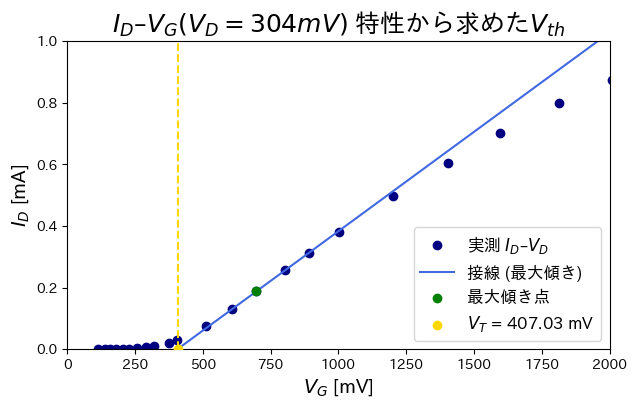

In [185]:
Vg = df_vd300["V_G(mV)"].values
Id = df_vd300["I_D"].values

# 中央差分で数値微分（dId/dVd）
dId_dVg = np.gradient(Id, Vg)

# 傾きが最大になる点（＝急上昇点）を特定
max_index = np.argmax(dId_dVg)
Vg_max_slope = Vg[max_index]
Id_max_slope = Id[max_index]
slope_max = dId_dVg[max_index]

# 接線（1次関数）を作成：y = slope_max * (Vd - Vd0) + Id0
Vg_fit = np.linspace(min(Vg), max(Vg), 200)
tangent_line = slope_max * (Vg_fit - Vg_max_slope) + Id_max_slope

#Vth
vth = Vg_max_slope - Id_max_slope / slope_max

# プロット
plt.figure(figsize=(7, 4))
plt.plot(Vg, Id, 'o', label="実測 $I_D$–$V_D$", color = "navy")
plt.plot(Vg_fit, tangent_line, '-', label="接線 (最大傾き)", color="royalblue")
plt.scatter(Vg_max_slope, Id_max_slope, color='green', zorder=3, label="最大傾き点")
plt.scatter(vth, 0, color='gold', zorder=4, label=f'$V_T$ = {vth:.2f} mV')
plt.axvline(x=vth, linestyle='--', color='gold')
plt.xlim(0, 2000)
plt.ylim(0, 1.0)
plt.xlabel("$V_G$ [mV]", fontsize=14)
plt.ylabel("$I_D$ [mA]", fontsize=14)
plt.title("$I_D$–$V_G (V_D = 304 mV)$ 特性から求めた$V_{th}$", fontsize=18)
plt.legend(fontsize=12)
plt.savefig("vth2.png", bbox_inches='tight')
plt.show()

In [215]:
#Vthの理論値
e = 1.602e-19        
kappa_s = 12
kappa_ox = 3.9
eps0 = 8.854e-12     
NA = 7.7e22          
t_ox = 8e-9          
phi_B = 0.4         
V_fb = -1          

# 酸化膜容量
Cox = kappa_ox * eps0 / t_ox
# 半導体誘電率
eps_s = kappa_s*eps0

root = np.sqrt(4*eps_s*e*NA*phi_B)
# 理論しきい値電圧
VT_theory = V_fb + 2*phi_B + root/Cox

print(Cox)
print(root)
print(f"理論値としての VT ≈ {VT_theory:.3f} V")

0.004316324999999999
0.0014480947920353833
理論値としての VT ≈ 0.135 V


In [218]:
#dID/dVDを使用
#VG = 999のデータを使用
df_dvd = df_vg1000  # 列名: Id, Vd
Vd = df_dvd["V_D real"].values
Id = df_dvd["I_D(mA)"].values


dId_dVd = np.gradient(Id, Vd)
Vd_max_slope = Vd[0]
Id_max_slope = Id[0]
slope_dvd = dId_dVd[0]


print(f"dID/dVD = {slope_dvd:.3e}")

#パラメータの定義
VG = 0.999
W = 20
L = 2
Vth = 0.375 #理論値を採用

# 移動度 μ の計算（リニア領域の近似式より）
mu_dVD = (L / W) * (1 / Cox) * (1 / (VG - Vth)) * slope_dvd
print(f"移動度 μ（dID/dVD から） ≈ {mu_dVD*1e4:.3e} cm²/Vs")

dID/dVD = 1.517e-03
移動度 μ（dID/dVD から） ≈ 5.630e+02 cm²/Vs


In [219]:
df_dvd = df_vg3000  # 列名: Id, Vd
Vd = df_dvd["V_D real"].values
Id = df_dvd["I_D(mA)"].values


dId_dVd = np.gradient(Id, Vd)
Vd_max_slope = Vd[0]
Id_max_slope = Id[0]
slope_dvd = dId_dVd[0]


print(f"dID/dVD = {slope_dvd:.3e}")

#パラメータの定義
VG = 3
W = 20
L = 2
Vth = 0.375 #理論値を採用

# 移動度 μ の計算（リニア領域の近似式より）
mu_dVD = (L / W) * (1 / Cox) * (1 / (VG - Vth)) * slope_dvd
print(f"移動度 μ（dID/dVD から） ≈ {mu_dVD*1e4:.3e} cm²/Vs")

dID/dVD = 3.881e-03
移動度 μ（dID/dVD から） ≈ 3.425e+02 cm²/Vs


In [225]:
#dID/dVDを使用
#Vd = 103のデータを使用
df_dvd = df_vd100  # 列名: Id, Vd
Vg = df_dvd["V_G(mV)"].values
Id = df_dvd["I_D"].values


# 中央差分で数値微分（dId/dVd）
dId_dVg = np.gradient(Id, Vg)

# 傾きが最大になる点（＝急上昇点）を特定
max_index = np.argmax(dId_dVg)
Vg_max_slope = Vg[max_index]
Id_max_slope = Id[max_index]
slope_dvg = dId_dVg[max_index]

print(f"dID/dVG = {slope_dvg:.3e}")

#パラメータの定義
VD = 0.103
W = 20
L = 2

# 移動度 μ の計算（リニア領域の近似式より）
mu_dVG = (L / W) * (1 / Cox) * (1 / VD) * slope_dvg
print(f"移動度 μ（dID/dVG から） ≈ {mu_dVG*1e4:.3e} cm²/Vs")

dID/dVG = 2.245e-04
移動度 μ（dID/dVG から） ≈ 5.049e+02 cm²/Vs


In [226]:
#dID/dVDを使用
#VG = 304のデータを使用
df_dvd = df_vd300  # 列名: Id, Vd
Vg = df_dvd["V_G(mV)"].values
Id = df_dvd["I_D"].values


# 中央差分で数値微分（dId/dVd）
dId_dVg = np.gradient(Id, Vg)

# 傾きが最大になる点（＝急上昇点）を特定
max_index = np.argmax(dId_dVg)
Vg_max_slope = Vg[max_index]
Id_max_slope = Id[max_index]
slope_dvg = dId_dVg[max_index]


print(f"dID/dVG = {slope_dvg:.3e}")

#パラメータの定義
VD = 0.304
W = 20
L = 2

# 移動度 μ の計算（リニア領域の近似式より）
mu_dVG = (L / W) * (1 / Cox) * (1 / VD) * slope_dvg
print(f"移動度 μ（dID/dVG から） ≈ {mu_dVG*1e4:.3e} cm²/Vs")

dID/dVG = 6.454e-04
移動度 μ（dID/dVG から） ≈ 4.919e+02 cm²/Vs


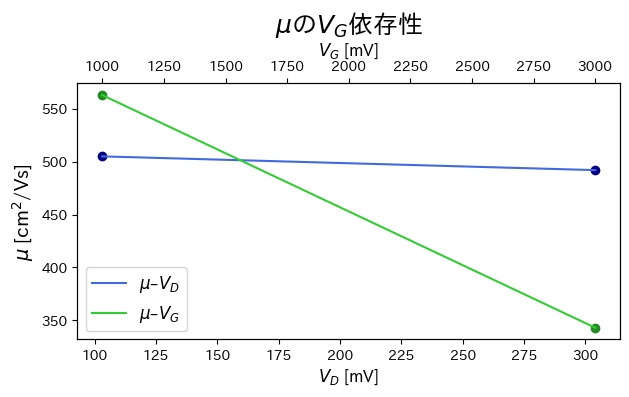

In [253]:
#移動度とVgの関係図

data_x1 = [999, 3000]
data_y1 = [563, 343]

data_x2 = [103, 304]
data_y2 = [505, 492]

slope1 = (data_y1[1] - data_y1[0]) / (data_x1[1] - data_x1[0])
slope2 = (data_y2[1] - data_y2[0]) / (data_x2[1] - data_x2[0])

intercept1 = data_y1[0] - slope1 * data_x1[0]
intercept2 = data_y2[0] - slope2 * data_x2[0]

x_vals1 = np.linspace(min(data_x1), max(data_x1), 200)
y_vals1 = slope1 * x_vals1 + intercept1

x_vals2 = np.linspace(min(data_x2), max(data_x2), 200)
y_vals2 = slope2 * x_vals2 + intercept2


fig, ax1 = plt.subplots(figsize=(7, 4))


line1, = ax1.plot(data_x2, data_y2, 'o', color='navy')
line2, = ax1.plot(x_vals2, y_vals2, '-', color='royalblue', label="$\mu$–$V_D$")
ax1.set_xlabel("$V_D$ [mV]", fontsize=12)
ax1.set_ylabel("$\mu$ [cm$^2$/Vs]", fontsize=14)

ax2 = ax1.twiny()
line3, = ax2.plot(data_x1, data_y1, 'o', color='forestgreen')
line4, = ax2.plot(x_vals1, y_vals1, '-', color='limegreen', label="$\mu$–$V_G$")
ax2.set_xlabel("$V_G$ [mV]", fontsize=12)

ax1.legend(handles=[line2, line4], loc='lower left', fontsize=12)

plt.title("$\mu$の$V_G$依存性", fontsize=18)

fig.subplots_adjust(top=0.75)  # 上軸のラベルが切れないように調整
plt.savefig("mu.png", bbox_inches='tight')
plt.show()

#### 半導体工学実験

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("daiodo.csv")

In [8]:
df.head()

,電流(mA),電圧(mV)
0,0.019,1.9
1,0.045,4.5
2,0.124,12.4
3,0.184,18.4
4,0.504,50.4


In [11]:
V = df["電圧(mV)"].values
I = df["電流(mA)"].values

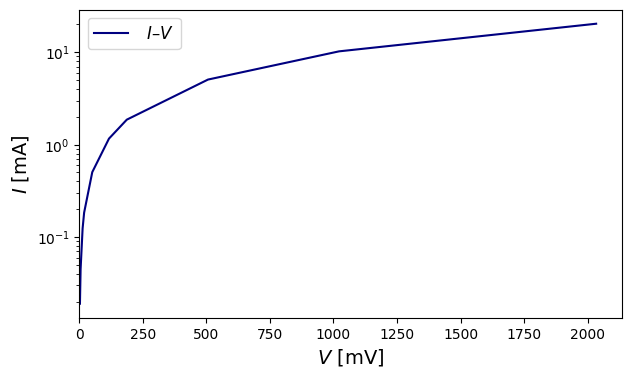

In [25]:
plt.figure(figsize=(7, 4))
plt.plot(V, I, label=" $I$–$V$", color = "navy")
plt.xlabel("$V$ [mV]", fontsize=14)
plt.ylabel("$I$ [mA]", fontsize=14)
plt.yscale("log")
plt.xlim(0,)
plt.legend(fontsize=12)
plt.show()

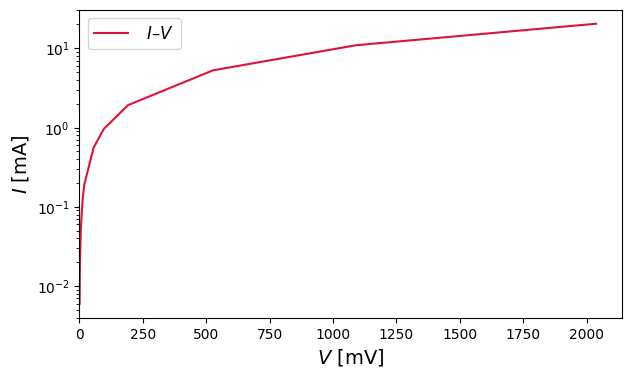

In [26]:
df_red = pd.read_csv("redled.csv")
V_red = df_red["電圧(mV)"].values
I_red = df_red["電流(mA)"].values

plt.figure(figsize=(7, 4))
plt.plot(V_red, I_red, label=" $I$–$V$", color = "crimson")
plt.yscale("log")
plt.xlim(0,)
plt.xlabel("$V$ [mV]", fontsize=14)
plt.ylabel("$I$ [mA]", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [21]:
df_red.head()

,電流(mA),電圧(mV)
0,0.006,0.6
1,0.018,1.8
2,0.054,5.4
3,0.130,13.0
4,0.191,19.1
